In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bicycle import Bicycle

%matplotlib inline

# Visualization

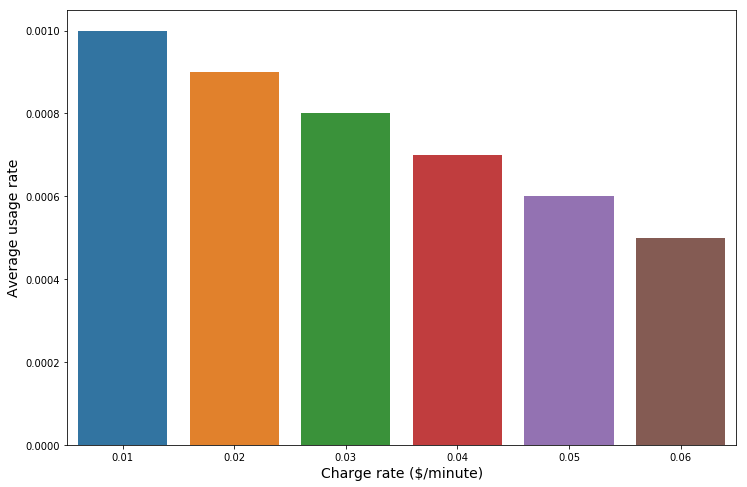

In [2]:
# usage rate vs. charge rate
rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
usage = [0.0010, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005]

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=rates, y=usage, ax=ax)
ax.set_xlabel('Charge rate ($/minute)', fontsize=14)
ax.set_ylabel('Average usage rate', fontsize=14)
fig.savefig('./images/usage_rate.png', dpi=300)
plt.show()

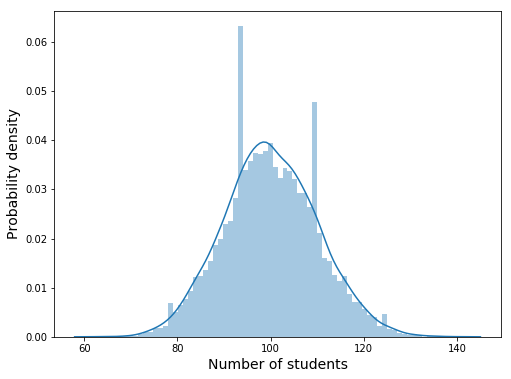

In [3]:
# Poisson distribution
samples = np.random.poisson(100, size=10000)

fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(samples, bins=len(np.unique(samples)), ax=ax)
ax.set_xlabel('Number of students', fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)
fig.savefig('./images/poisson.png', dpi=300)
plt.show()

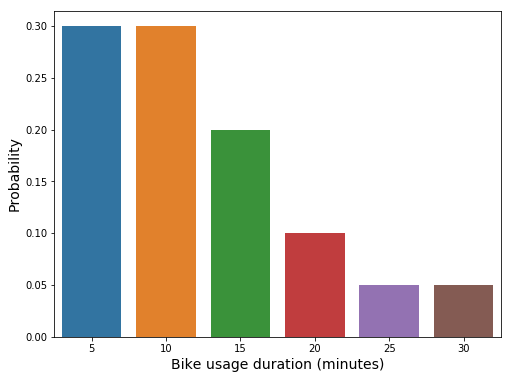

In [4]:
# probability of bike usage duration
times = [5, 10, 15, 20, 25, 30]
prob = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=times, y=prob, ax=ax)
ax.set_xlabel('Bike usage duration (minutes)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
fig.savefig('./images/usage_duration.png', dpi=300)
plt.show()

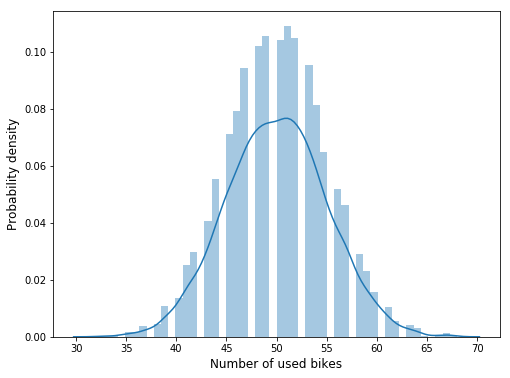

In [5]:
# binomial distribution
samples = np.random.binomial(100, p=0.5, size=10000)

fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(samples, ax=ax)
ax.set_xlabel('Number of used bikes', fontsize=12)
ax.set_ylabel('Probability density', fontsize=12)
fig.savefig('./images/used_bike.png', dpi=300)
plt.show()

# Simulation

In [6]:
num_bike_lists = [200, 300, 400, 500, 600, 700, 800]
charge_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
profit_mean = []
profit_std = []
bike_list = []
rate_list = []
duration_mean = []
duration_std = []

for num_bike in num_bike_lists:
    for rate in charge_rates:
        tmp_profit = []
        tmp_duration = []
        for i in range(1000):
            bike = Bicycle(num_bike=num_bike, rate=rate, seed=None)
            tmp_profit.append(bike.simulate())
            tmp_duration.append(bike.usage_duration)
            
        bike_list.append(num_bike)
        rate_list.append(rate)
        profit_mean.append(np.mean(tmp_profit))
        profit_std.append(np.std(tmp_profit))
        duration_mean.append(np.mean(tmp_duration))
        duration_std.append(np.std(tmp_duration))
        
maps = {'num_bike': bike_list, 'rate': rate_list, 'revenue': profit_mean, 'revenue_std': profit_std, 
        'duration': duration_mean, 'duration_std': duration_std}
df = pd.DataFrame(maps, columns=['num_bike', 'rate', 'revenue', 'revenue_std', 'duration', 'duration_std'])

df.head()

,num_bike,rate,revenue,revenue_std,duration,duration_std
0,200,0.01,-69.60855,7.060068,33039.145,706.006795
1,200,0.02,195.43120,14.000640,29771.560,700.032011
2,200,0.03,392.26640,19.405425,26408.880,646.847506
3,200,0.04,524.60200,24.927132,23115.050,623.178303
4,200,0.05,592.76375,28.356512,19855.275,567.130231


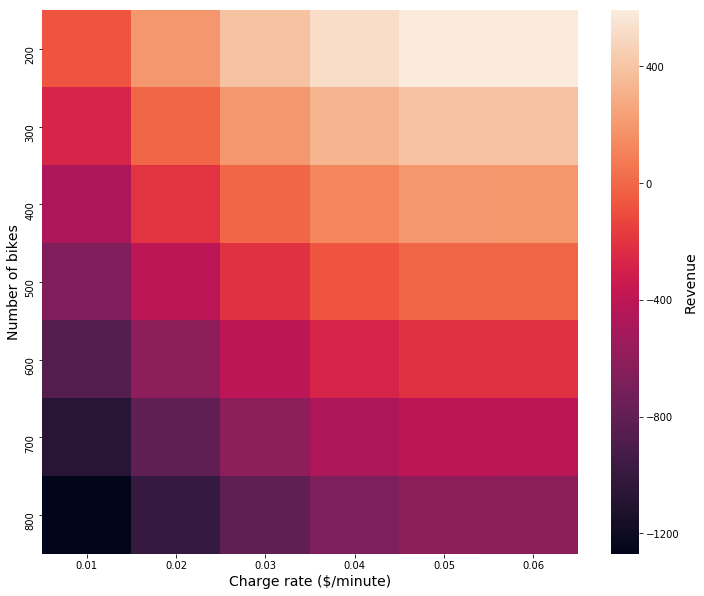

In [7]:
pivot = pd.pivot_table(df, values='revenue', index='num_bike', columns='rate')

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot, ax=ax, cbar_kws={'label': 'Revenue'})
ax.set_xlabel('Charge rate ($/minute)', fontsize=14)
ax.set_ylabel('Number of bikes', fontsize=14)
ax.figure.axes[-1].yaxis.label.set_size(14)
fig.savefig('./images/revenue_heatmap.png', dpi=300)
plt.show()

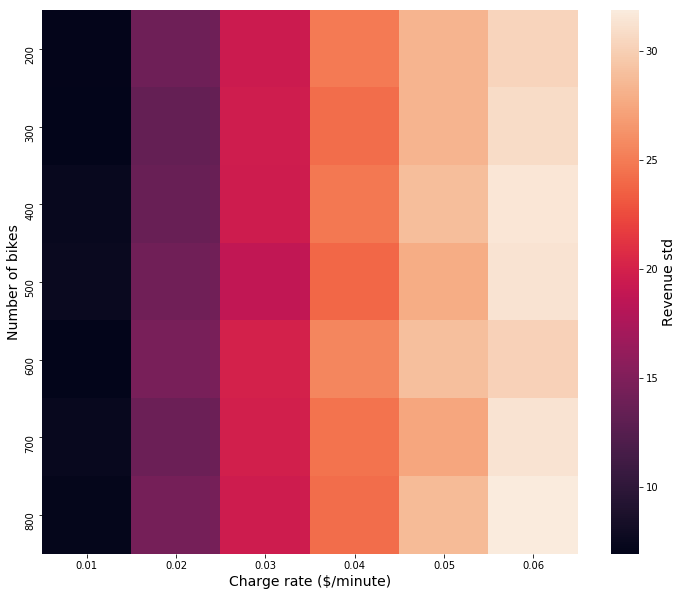

In [8]:
pivot = pd.pivot_table(df, values='revenue_std', index='num_bike', columns='rate')

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot, ax=ax, cbar_kws={'label': 'Revenue std'})
ax.set_xlabel('Charge rate ($/minute)', fontsize=14)
ax.set_ylabel('Number of bikes', fontsize=14)
ax.figure.axes[-1].yaxis.label.set_size(14)
fig.savefig('./images/std_heatmap.png', dpi=300)
plt.show()

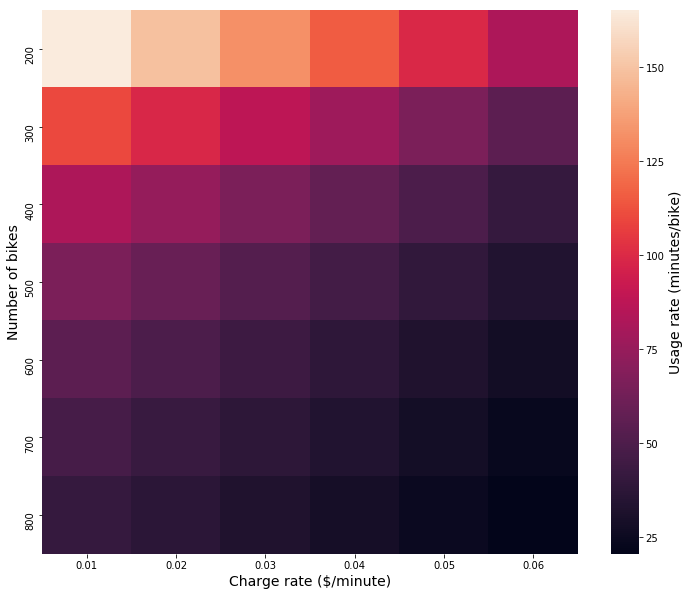

In [13]:
df['mean_duration'] = df['duration'] / df['num_bike']
pivot = pd.pivot_table(df, values='mean_duration', index='num_bike', columns='rate')

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot, ax=ax, cbar_kws={'label': 'Usage rate (minutes/bike)'})
ax.set_xlabel('Charge rate ($/minute)', fontsize=14)
ax.set_ylabel('Number of bikes', fontsize=14)
ax.figure.axes[-1].yaxis.label.set_size(14)
fig.savefig('./images/duration_heatmap.png', dpi=300)
plt.show()

# Separate Cases

In [20]:
bike = Bicycle(num_bike=100, rate=0.06, seed=None)
bike.simulate()

866.5

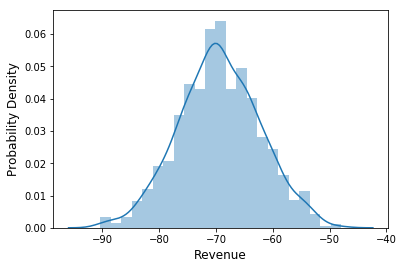

In [10]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=200, rate=0.01, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()

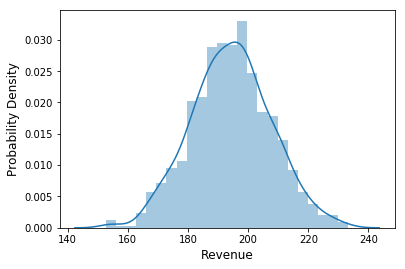

In [11]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=200, rate=0.02, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()

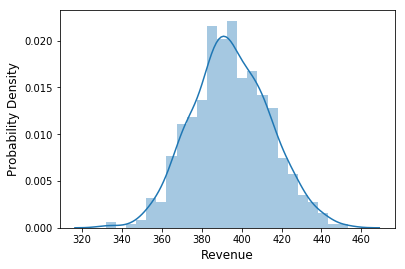

In [12]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=200, rate=0.03, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()

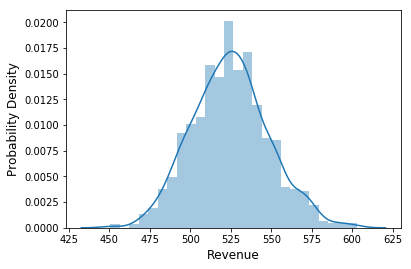

In [13]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=200, rate=0.04, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()

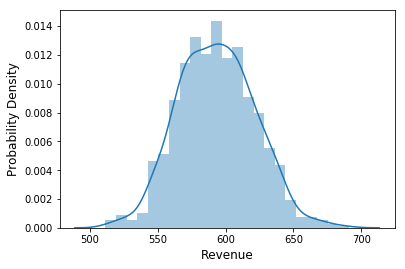

In [14]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=200, rate=0.05, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()

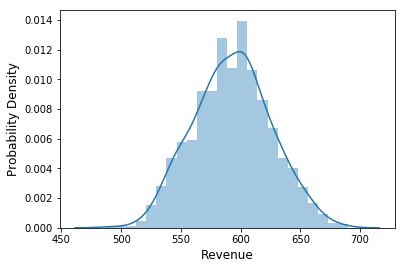

In [15]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=200, rate=0.06, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()

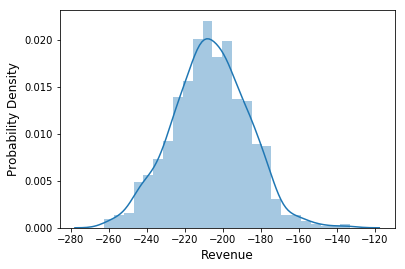

In [16]:
profit = []
for i in range(1000):
    bike = Bicycle(num_bike=500, rate=0.03, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
plt.show()